In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Configure MPL parameters (taken from https://github.com/jbmouret/matplotlib_for_papers)
golden_ratio = (5**.5 - 1) / 2
params = {
    'figure.figsize': [5, 5*golden_ratio],
    "text.usetex": True,
    "font.family": "serif",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
mpl.rcParams.update(params)

%matplotlib inline

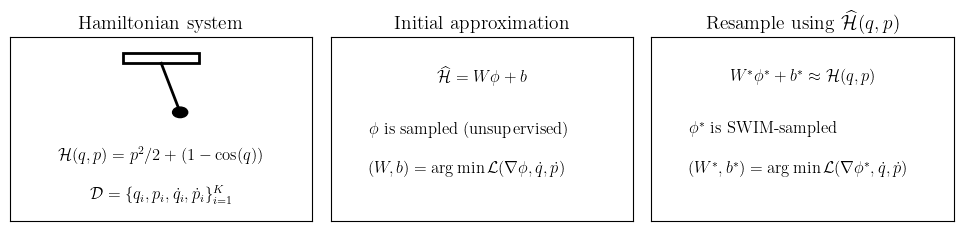

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,4*golden_ratio), dpi=100)

# draw pendulum
L = 0.5  
angle = np.pi / 6
pivot = [0, 1.5]
pendulum_end = [L * np.sin(angle), 1 - L * np.cos(angle)]
ax1.add_patch(plt.Rectangle((-0.5, 1.5), 1, 0.2, fill=False, color="k", lw=2))
ax1.plot([pivot[0], pendulum_end[0]], [pivot[1], pendulum_end[1]], "k", lw=2)
ax1.add_patch(plt.Circle((pendulum_end[0], pendulum_end[1]), 0.1, color="k"))

ax1.text(0, -0.25, r"$\mathcal{H}(q, p) = p^2 / 2 + (1 - \cos(q))$", ha="center", va="center")
ax1.text(0, -1,   r"$\mathcal{D}=\{q_i, p_i, \dot{q}_i, \dot{p}_i\}_{i=1}^{K}$", ha="center", va="center")

ax1.set_xlim(-2, 2)
ax1.set_ylim(-1.5, 2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Hamiltonian system")

# Initial approximation (ELM or U-SWIM)
ax2.text(0, 1.25, r"$\widehat{\mathcal{H}} = W \phi + b$", ha="center", va="center")
ax2.text(-1.5, 0.25,   r"$\phi$ is sampled (unsupervised)", ha="left", va="center")
ax2.text(-1.5, -0.5,   r"$(W,b) = \arg\min \mathcal{L}(\nabla \phi, \dot{q}, \dot{p})$", ha="left", va="center")

ax2.set_xlim(-2, 2)
ax2.set_ylim(-1.5, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Initial approximation")

# Resample using the initial approximation
ax3.text(0, 1.25, r"$W^{*} \phi^{*} + b^{*} \approx \mathcal{H}(q,p)$", ha="center", va="center")
ax3.text(-1.5, 0.25, r"$\phi^{*}$ is SWIM-sampled", ha="left", va="center")
ax3.text(-1.5, -0.5, r"$(W^{*}, b^{*}) = \arg\min \mathcal{L}(\nabla \phi^{*}, \dot{q}, \dot{p})$", ha="left", va="center")

ax3.set_xlim(-2, 2)
ax3.set_ylim(-1.5, 2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"Resample using $\widehat{\mathcal{H}}(q,p)$")

fig.tight_layout()
fig.savefig("plots/approx-swim-idea.pdf")

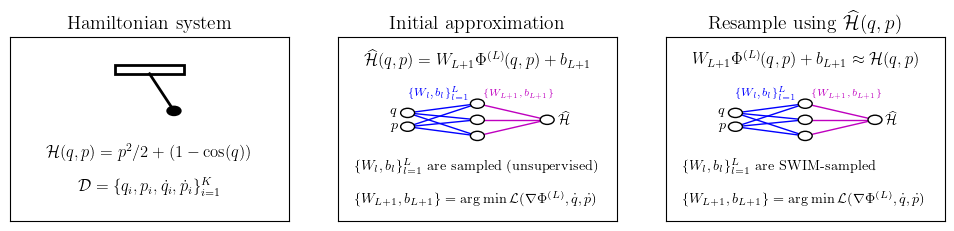

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# draw neural network 
def draw_neural_network(ax, start=(-1.0, 0.2)):
    start_x, start_y = start
    
    # input nodes
    ax.add_patch(plt.Circle((start_x, start_y+0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x, start_y-0.15), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x-0.25, start_y+0.125, r"$q$", fontsize="small")
    ax.text(start_x-0.25, start_y-0.2, r"$p$", fontsize="small")

    # hidden nodes
    ax.add_patch(plt.Circle((start_x+1.0, start_y-0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y+0.35), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.add_patch(plt.Circle((start_x+1.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))

    # edges to hidden nodes
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y+0.15, start_y], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y-0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y+0.35], c="b", linewidth=1))
    ax.add_line(plt.Line2D([start_x, start_x+1.0], [start_y-0.15, start_y], c="b", linewidth=1))
    ax.text(start_x, start_y+0.5, r"$\{W_{l},b_{l}\}_{l=1}^{L}$", fontsize="x-small", c="blue")

    # output node
    ax.add_patch(plt.Circle((start_x+2.0, start_y), 0.1, color="w", ec="k", zorder=4, lw=1))
    ax.text(start_x+2.15, start_y-0.1, r"$\widehat{\mathcal{H}}$", fontsize="small")

    # edges to output node
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y-0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y+0.35, start_y], c="m", linewidth=1))
    ax.add_line(plt.Line2D([start_x+1.0, start_x+2.0], [start_y, start_y], c="m", linewidth=1))
    ax.text(start_x+1.1, start_y+0.5, r"$\{W_{L+1}, b_{L+1}\}$", fontsize="xx-small", c="m")

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10,4*golden_ratio), dpi=100)

# draw pendulum
L = 0.7  
angle = np.pi / 6
pivot = [0, 1.2]
pendulum_end = [L * np.sin(angle), 1 - L * np.cos(angle)]
ax1.add_patch(plt.Rectangle((-0.5, 1.2), 1, 0.2, fill=False, color="k", lw=2))
ax1.plot([pivot[0], pendulum_end[0]], [pivot[1], pendulum_end[1]], "k", lw=2)
ax1.add_patch(plt.Circle((pendulum_end[0], pendulum_end[1]), 0.1, color="k"))
ax1.text(0, -0.5, r"$\mathcal{H}(q, p) = p^2 / 2 + (1 - \cos(q))$", ha="center", va="center")
ax1.text(0, -1.25,   r"$\mathcal{D}=\{q_i, p_i, \dot{q}_i, \dot{p}_i\}_{i=1}^{K}$", ha="center", va="center")
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Hamiltonian system")

# initial approximation (ELM or U-SWIM)
ax2.text(0, 1.5, r"$\widehat{\mathcal{H}}(q,p) = W_{L+1} \Phi^{(L)}(q,p) + b_{L+1}$", ha="center", va="center")
draw_neural_network(ax2)          
ax2.text(-1.75, -0.8,   r"$\{W_l, b_l\}_{l=1}^{L}$ are sampled (unsupervised)", ha="left", va="center", fontsize="small")
ax2.text(-1.75, -1.5,   r"$\{W_{L+1},b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \dot{q}, \dot{p})$", ha="left", va="center", fontsize="small")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Initial approximation")

# Resample using the initial approximation
ax3.text(0, 1.5, r"$W_{L+1} \Phi^{(L)}(q,p) + b_{L+1} \approx \mathcal{H}(q,p)$", ha="center", va="center")
draw_neural_network(ax3)
ax3.text(-1.75, -0.8, r"$\{W_l, b_l\}_{l=1}^{L}$ are SWIM-sampled", ha="left", va="center", fontsize="small")
ax3.text(-1.75, -1.5, r"$\{W_{L+1}, b_{L+1}\} = \arg\min \mathcal{L}(\nabla \Phi^{(L)}, \dot{q}, \dot{p})   $", ha="left", va="center", fontsize="small")

ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"Resample using $\widehat{\mathcal{H}}(q,p)$")

fig.tight_layout()
fig.savefig("plots/approx-swim-idea-with-nn.pdf")